<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_filepath = '/Users/kiefer/github-repos/DSI-SF/datasets/state_sat_scores/sat_scores.csv'

In [3]:
with open(sat_filepath, 'r') as f:
    rows = [row for row in csv.reader(f)]
    header = rows[0]
    data = rows[1:]
    sat = {header[i]:[float(row[i]) if row[i].isdigit() else row[i] for row in data] for i in range(len(header))}

In [4]:
from pprint import pprint
print header
pprint(sat['State'])

['State', 'Rate', 'Verbal', 'Math']
['CT',
 'NJ',
 'MA',
 'NY',
 'NH',
 'RI',
 'PA',
 'VT',
 'ME',
 'VA',
 'DE',
 'MD',
 'NC',
 'GA',
 'IN',
 'SC',
 'DC',
 'OR',
 'FL',
 'WA',
 'TX',
 'HI',
 'AK',
 'CA',
 'AZ',
 'NV',
 'CO',
 'OH',
 'MT',
 'WV',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS',
 'All']


### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
csv_sat = pd.DataFrame(sat)
sat = pd.read_csv(sat_filepath)

print csv_sat.dtypes
print sat.dtypes

# A:
# I converted the numeric columns to float when converting the csv, but pandas interpreted them
# as integers. This is shown by the datatypes below:

Math      float64
Rate      float64
State      object
Verbal    float64
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
sat.head(10)

# We have the State of the average:
# Rate (percent of students that take the SAT)
# Verbal (average verbal score)
# Math (average math score)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


**If you were careful you would have noticed that the last line in the data is a summary.**

The last row has the averages for "All", across the different states. I'm going to remove this and put it in its own DataFrame, otherwise I'm including a non-state in the visualizations below!

If you missed this – don't worry, but keep this in mind for the future. Rigorous investigation is necessary when loading and cleaning data.

In [7]:
print sat.tail(3)

   State  Rate  Verbal  Math
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514


In [8]:
all_avg = sat[sat.State == 'All']
sat = sat[sat.State != 'All']

print all_avg.shape
print len(sat.State.unique())
print sat.State.unique()

(1, 4)
51
['CT' 'NJ' 'MA' 'NY' 'NH' 'RI' 'PA' 'VT' 'ME' 'VA' 'DE' 'MD' 'NC' 'GA' 'IN'
 'SC' 'DC' 'OR' 'FL' 'WA' 'TX' 'HI' 'AK' 'CA' 'AZ' 'NV' 'CO' 'OH' 'MT' 'WV'
 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE' 'OK' 'MO' 'LA' 'WI'
 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
data_dict = {
    'State':{
        'type':sat.State.dtype,
        'description':'State id.'
    },
    'Rate':{
        'type':sat.Rate.dtype,
        'description':'Percent of students that took SAT.'
    },
    'Math':{
        'type':sat.Math.dtype,
        'description':'Average math scores on SAT.'
    },
    'Verbal':{
        'type':sat.Verbal.dtype,
        'description':'Average verbal scores on SAT.'
    },
    'dataset_shape':sat.shape
}

pprint(data_dict)

{'Math': {'description': 'Average math scores on SAT.',
          'type': dtype('int64')},
 'Rate': {'description': 'Percent of students that took SAT.',
          'type': dtype('int64')},
 'State': {'description': 'State id.', 'type': dtype('O')},
 'Verbal': {'description': 'Average verbal scores on SAT.',
            'type': dtype('int64')},
 'dataset_shape': (51, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

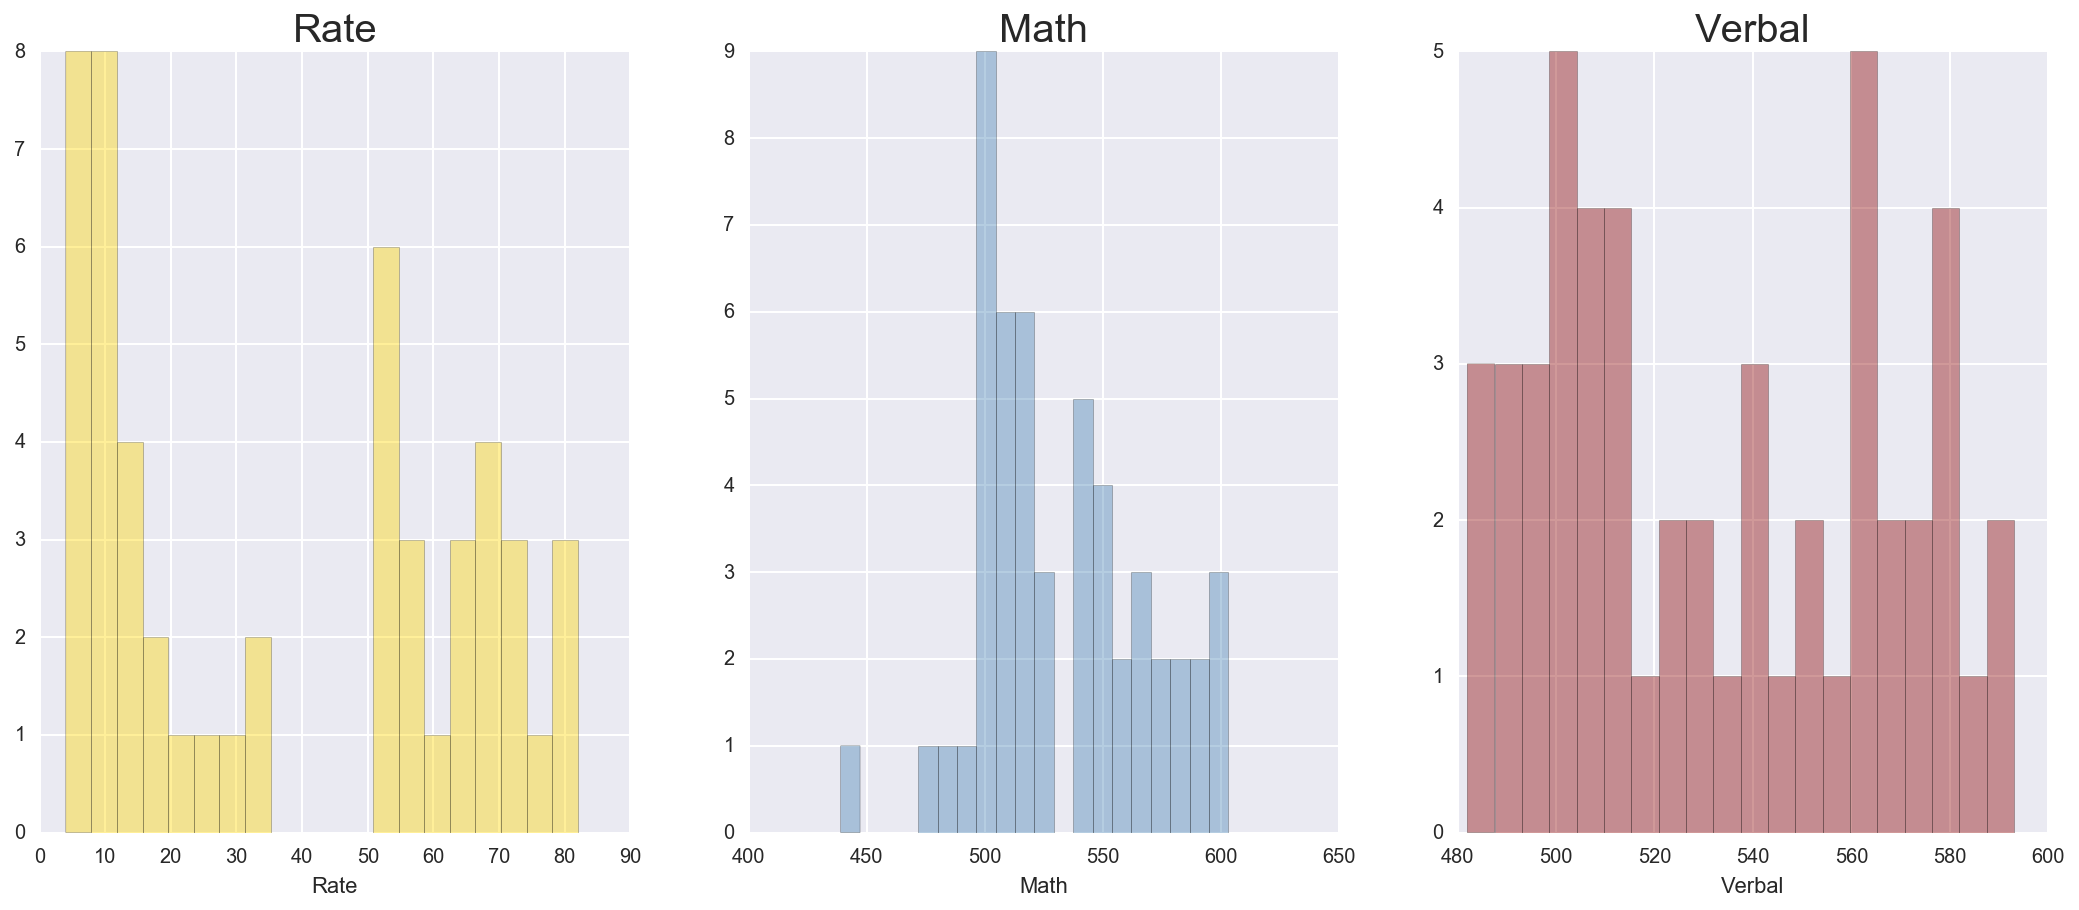

In [10]:
# Going to plot these on 3 axes within the same figure. Totally fine if you did them
# on individual axes or just with the seaborn function, of course.

import matplotlib.pyplot as plt
import seaborn as sns

fig, axarr = plt.subplots(1, 3, figsize=(18,7))

axarr[0] = sns.distplot(sat.Rate, kde=False, color='gold', ax=axarr[0], bins=20)
axarr[1] = sns.distplot(sat.Math, kde=False, color='steelblue', ax=axarr[1], bins=20)
axarr[2] = sns.distplot(sat.Verbal, kde=False, color='darkred', ax=axarr[2], bins=20)

axarr[0].set_title('Rate', fontsize=20)
axarr[1].set_title('Math', fontsize=20)
axarr[2].set_title('Verbal', fontsize=20)

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

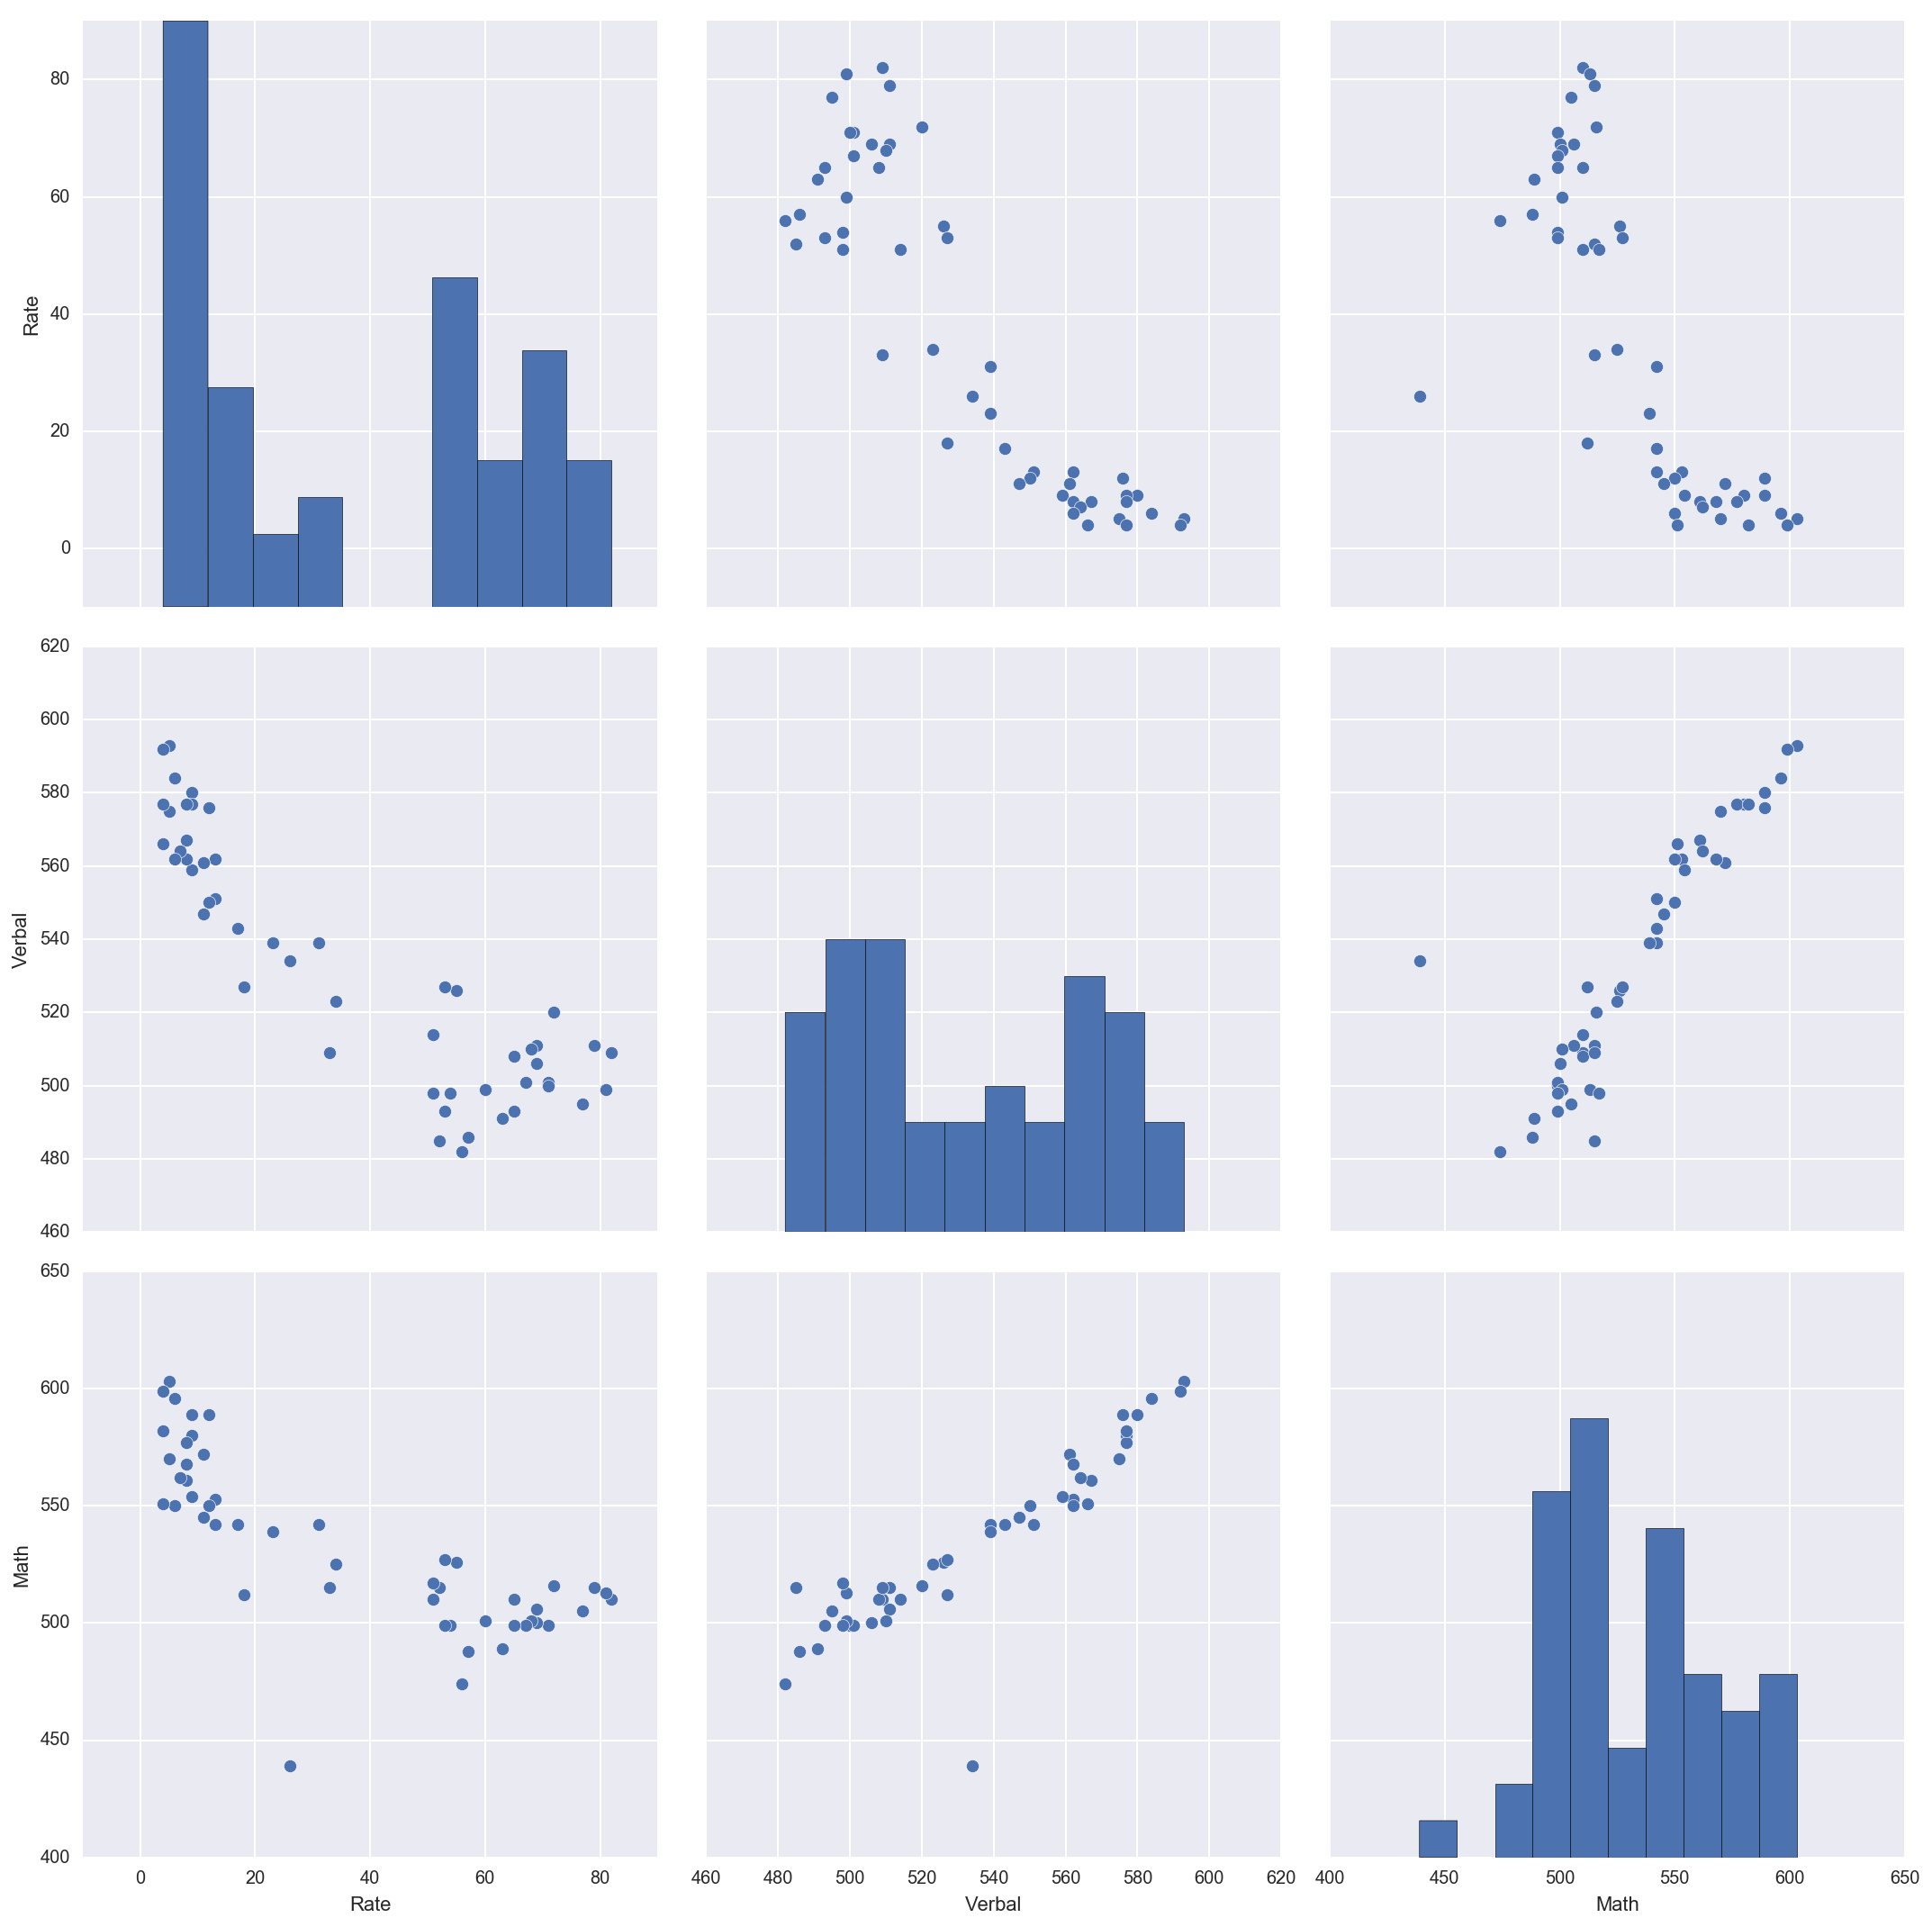

In [11]:
# Something to note here that you may not have seen yet:
# plot_kws allows me to pass a dictionary down to matplotlib's plot function 
# which is controlling the scatter plots. I'm telling it to set s=50 for those
# different scatter plots, which makes the points bigger.
sns.pairplot(sat, size=5, plot_kws={'s':50})

**A:** We've got a lot of clear relationships in this data as evidenced by the pairplot, and what looks like a single outlier state in there as well.

1. Increasing Rate is associated with lower scores in Math and Verbal, though perhaps not that strongly.
2. Verbal and Math scores are correlated.

Why would _more_ students taking the SAT in a state result in lower scores? I think what is going on here is that states that have low rates of SAT takers are states where public schools are of lower quality and don't push students to take it. The students that are taking the SAT in those states are more likely to be attending private school and come from a higher socioeconomic background.

Just a theory, though.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

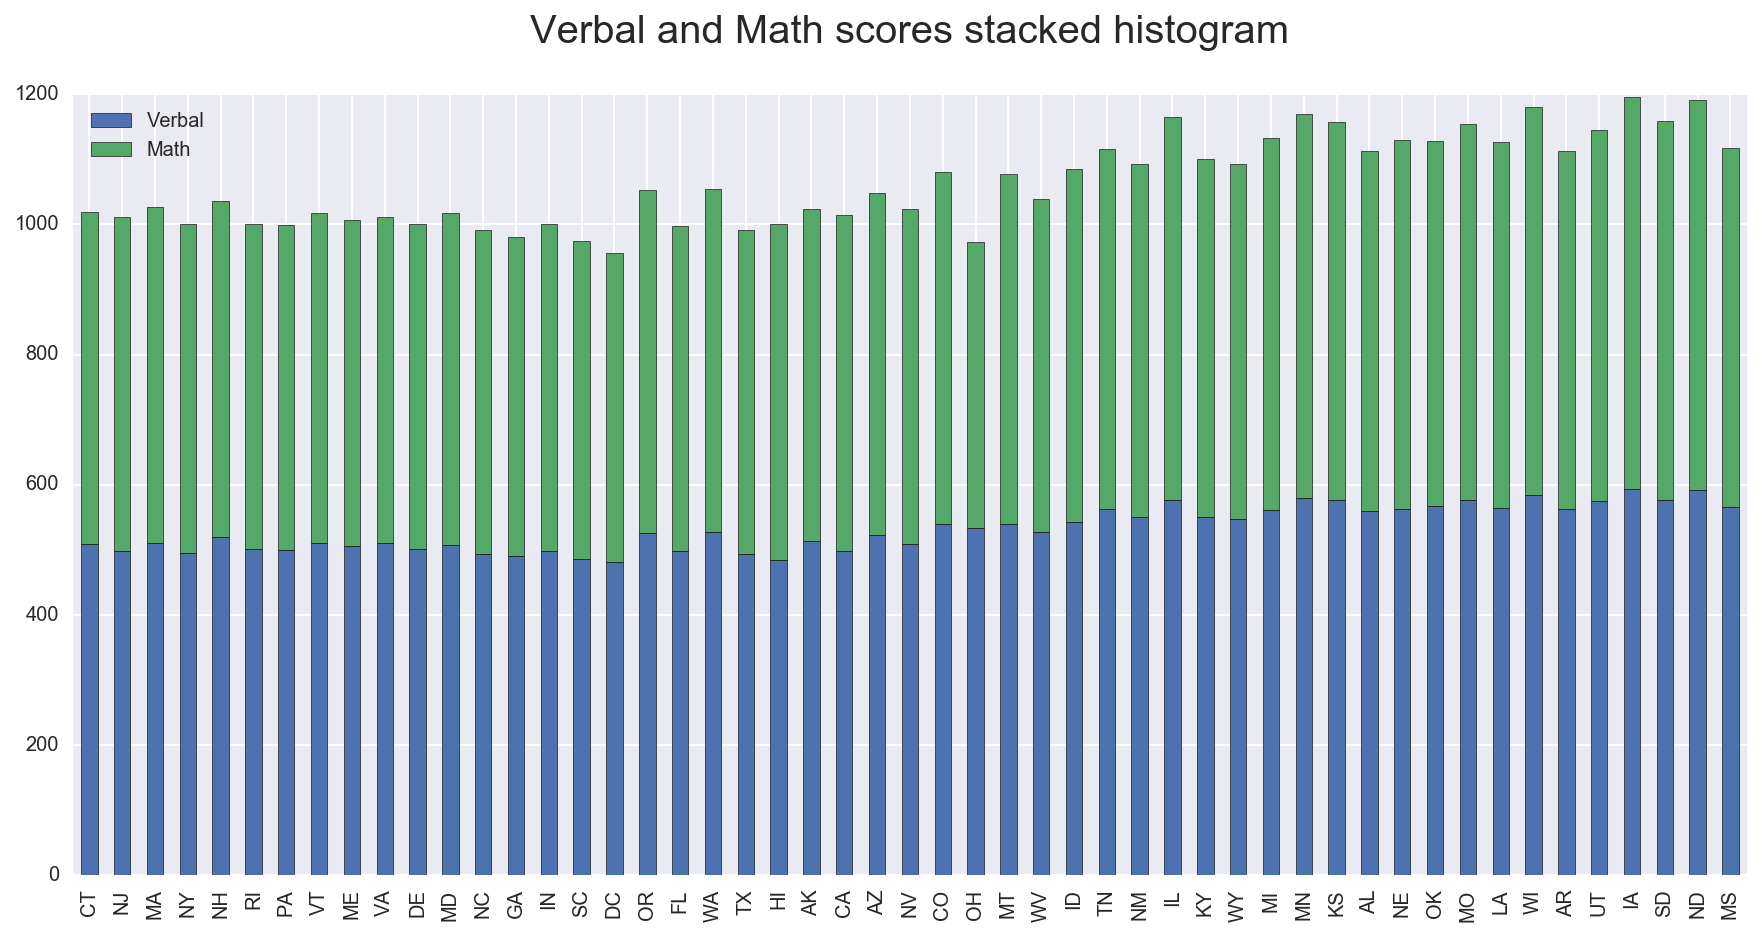

In [12]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()

# Plot the bars for just verbal and math
sat[['Verbal','Math']].plot.bar(stacked=True, ax=ax)

# put the title on
ax.set_title('Verbal and Math scores stacked histogram\n', fontsize=20)

# change the x-ticks to be the states instead of the row indices
# this wasn't required, but is nice
states = sat.State
ax.set_xticklabels(states)

plt.show()


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

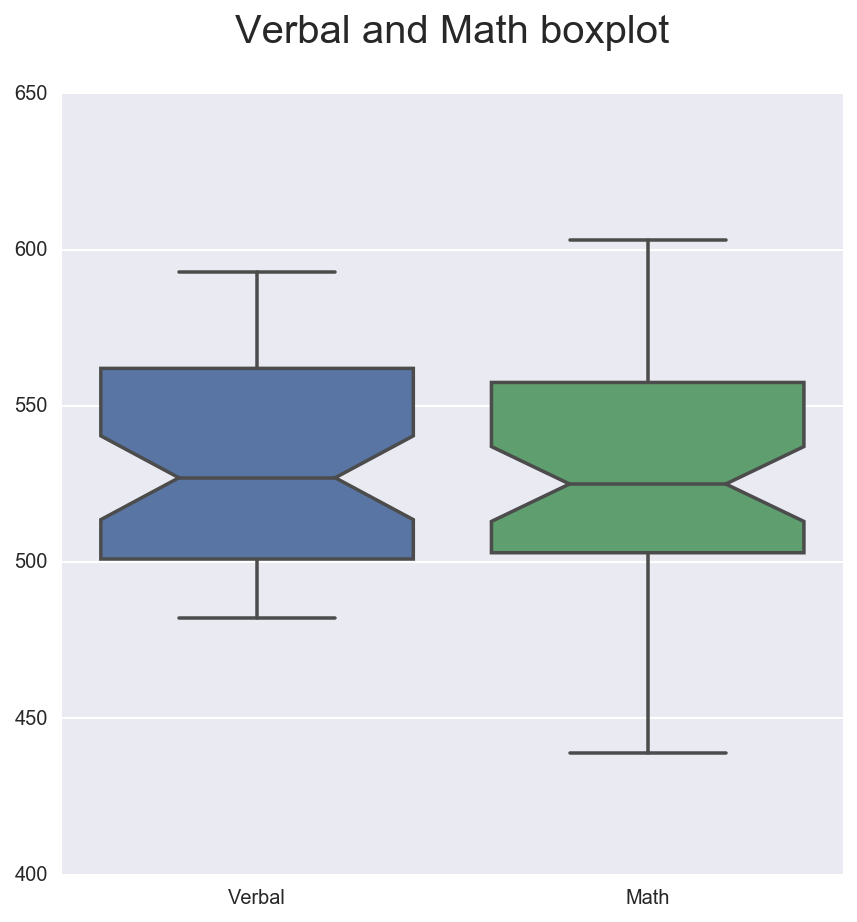

In [13]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax = sns.boxplot(data=sat[['Verbal','Math']], ax=ax, notch=True)

ax.set_title('Verbal and Math boxplot\n', fontsize=20)

plt.show()

**A:** A boxplot tells you information about the quantiles and outliers of a variable's distribution than just looking at a histogram. This allows us to directly compare side-by-side how these variables are distributed compared to each other, which would be difficult with a histogram.

A scatterplot will show us something different: a potential linear relationship between variables, or more generally how the variable's observations vary with each other.

Plotting rate on this chart is inappropriate because it is on a different scale.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


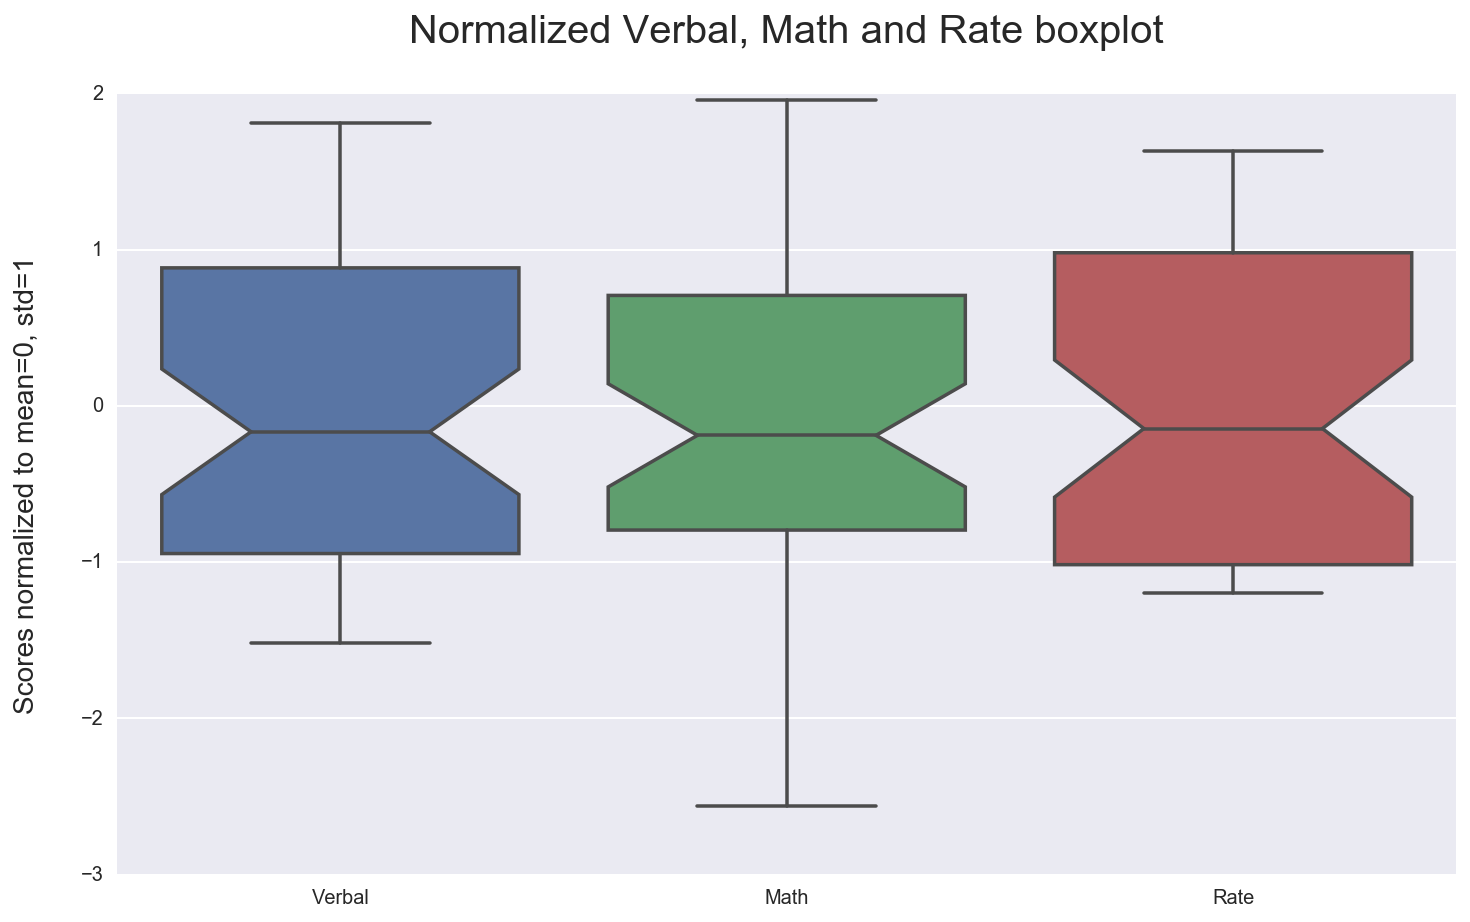

In [14]:
# I am just going to do standardization/normalization here, 
# subtracting the mean and dividing by the standard deviation for each variable.
# This means that each variable will have a mean 0 and a standard deviation 1, putting them on the same scale.
# This will let me compare them side-by-side on a boxplot.

sat_norm = sat[['Verbal','Math','Rate']]
sat_norm = (sat_norm - sat_norm.mean()) / sat_norm.std()

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

ax = sns.boxplot(data=sat_norm, ax=ax, notch=True)

ax.set_title('Normalized Verbal, Math and Rate boxplot\n', fontsize=20)
ax.set_ylabel('Scores normalized to mean=0, std=1\n', fontsize=14)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [15]:
verbal_mean = sat.Verbal.mean()

verbal_mask = (sat.Verbal > verbal_mean)

verbal_subset = sat.loc[verbal_mask, :]
verbal_subset

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [16]:
print verbal_subset.shape[0]

24


**A:** 24 states are scoring above the mean verbal score. This indicates that because essentially half of the states are above the mean, the distribution of verbal scores is not significantly skewed positively or negatively.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [18]:
verbal_median = sat.Verbal.median()

verbal_med_mask = (sat.Verbal > verbal_median)

verbal_med_subset = sat.loc[verbal_med_mask, :]
verbal_med_subset

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [19]:
print 'States above mean verbal score:', verbal_subset.State.count()
print 'States above median verbal score:', verbal_med_subset.State.count()

print 'Verbal mean:', verbal_mean
print 'Verbal median:', verbal_median

States above mean verbal score: 24
States above median verbal score: 24
Verbal mean: 532.529411765
Verbal median: 527.0


**A:** Both mean and median have 24 states above. Again, this is not a skewed distribution.

Just a note: SAT scores are normalized scores to give takers their "percentile", so non-skewness properties are enforced. You may have explored this in a later unrequired question.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [20]:
sat['Verbal_Math_diff'] = sat.Verbal - sat.Math
sat.head(3)

,State,Rate,Verbal,Math,Verbal_Math_diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [21]:
verbal_10greater = sat.sort_values('Verbal_Math_diff', ascending=False).iloc[0:10,:]
verbal_10lower= sat.sort_values('Verbal_Math_diff', ascending=True).iloc[0:10,:]

print verbal_10greater.head(3)
print verbal_10lower.head(3)

   State  Rate  Verbal  Math  Verbal_Math_diff
27    OH    26     534   439                95
50    MS     4     566   551                15
29    WV    18     527   512                15
   State  Rate  Verbal  Math  Verbal_Math_diff
21    HI    52     485   515               -30
23    CA    51     498   517               -19
1     NJ    81     499   513               -14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [22]:
sat[['Verbal','Math','Rate','Verbal_Math_diff']].corr()

,Verbal,Math,Rate,Verbal_Math_diff
Verbal,1.000000,0.899909,-0.888121,0.044527
Math,0.899909,1.000000,-0.773419,-0.395574
Rate,-0.888121,-0.773419,1.000000,-0.098671
Verbal_Math_diff,0.044527,-0.395574,-0.098671,1.000000


**A:** The correlation matrix shows us the (linear) relationships between variables as measured by the pearson correlation coefficient. A pearson r of -1 is a perfect inverse relationship, a 1 is a perfect relationship, and a 0 is no linear relationship.

Here's what we can see from the correlation matrix:

1. Verbal score is highly correlated with Math. So, States that score higher in one tend to score higher in the other, and vice versa.
2. Verbal is negatively correlated with rate. The higher proportion of students that take the SAT, the lower the average Verbal score.
3. Likewise, Math is negatively correlated with Rate as well, though not as much.
4. Verbal score has little to no relationship with the difference between verbal and math scores. What does this mean? As Verbal scores go up, this does not imply that the difference between verbal and Math increases!
5. Interestingly, the difference between verbal and math has a decent negative correlation with Math. This indicates that as the difference between verbal and math increases, average Math score is more likely to decrease, which makes sense.
6. Rate and verbal-math difference has a small, likely insignificant negative correlation.

So, you are probably wondering, **why is there no correlation between Verbal and the difference, but a negative correlation between Math and the difference?**

Let's create a pairplot of the variables to help understand this:

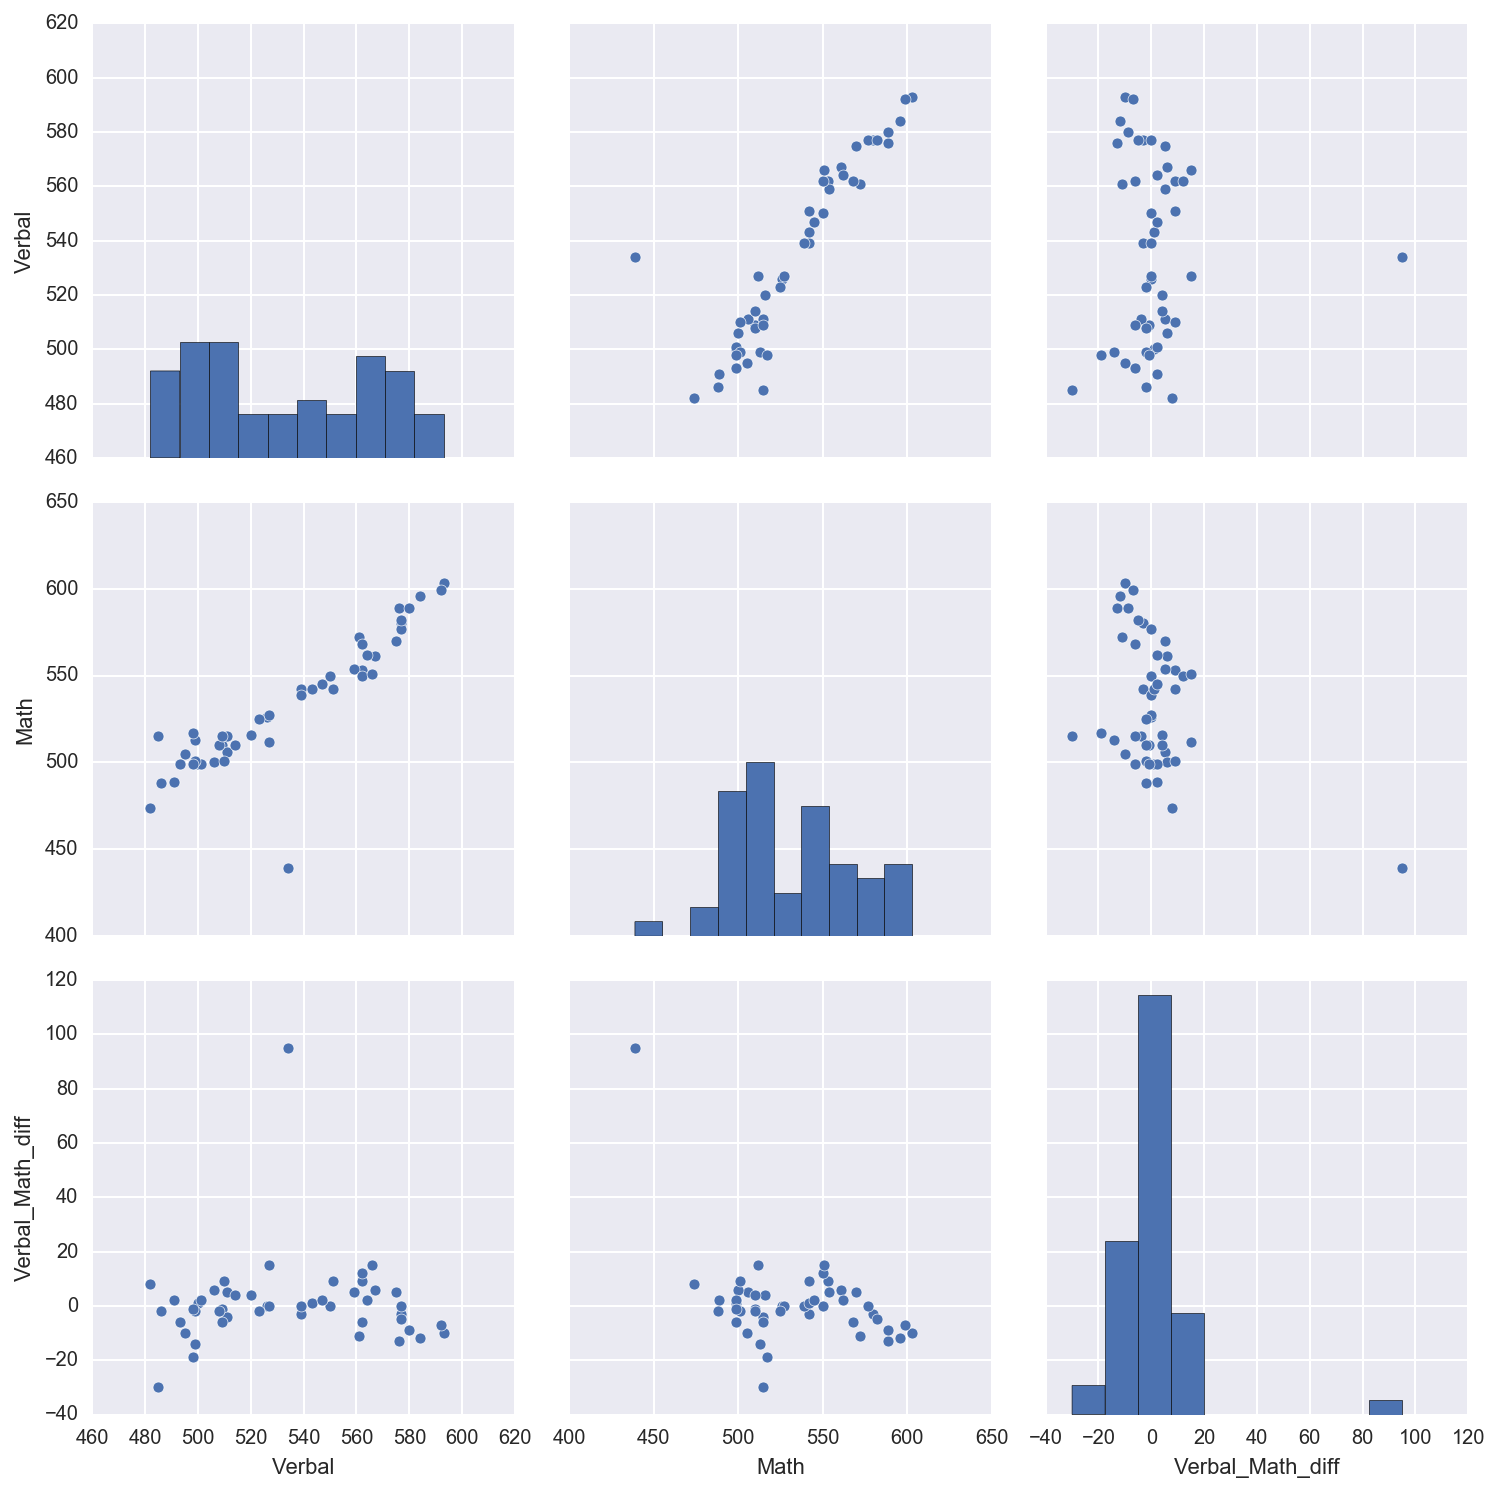

In [24]:
sns.pairplot(sat[['Verbal','Math','Verbal_Math_diff']], size=3.5, plot_kws={'s':30})

Besides that weird outlier, it looks like there isn't much of a correspondence. Is the difference in the correlations caused by the outlier?

I'll find the outlier state and remove it, then look at the correlation matrix again.

In [25]:
outlier_mask = (sat.Verbal_Math_diff == sat.Verbal_Math_diff.max())
outlier_state = sat.loc[outlier_mask, :]
outlier_state

,State,Rate,Verbal,Math,Verbal_Math_diff
27,OH,26,534,439,95


In [26]:
sat_nooutlier = sat.loc[sat.State != 'OH', :]
sat_nooutlier.corr()

,Rate,Verbal,Math,Verbal_Math_diff
Rate,1.000000,-0.889227,-0.854664,-0.095529
Verbal,-0.889227,1.000000,0.969265,0.074463
Math,-0.854664,0.969265,1.000000,-0.173161
Verbal_Math_diff,-0.095529,0.074463,-0.173161,1.000000


The correlation between Math and the difference has been dramatically reduced. This is an example of how outliers can affect your statistical metrics in unsavory ways, and why you need to be rigorous about examining your data.

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [27]:
sat_nooutlier.describe()

,Rate,Verbal,Math,Verbal_Math_diff
count,50.000000,50.000000,50.000000,50.000000
mean,37.220000,532.500000,533.700000,-1.200000
std,27.785101,33.698695,34.120584,8.417668
min,4.000000,482.000000,474.000000,-30.000000
25%,9.000000,501.000000,505.250000,-6.000000
50%,33.500000,526.500000,525.500000,0.000000
75%,64.500000,562.000000,559.250000,4.000000
max,82.000000,593.000000,603.000000,15.000000


    count: the number of observations/rows/states (we've taken out OH the outlier at this point)
    mean: the mean of the column
    std: standard deviation of the column
    min: minimum value of the column
    25%: the 25% quantile, which is, if we were to order all the values in the column from lowest to highest, the value 25% of the way through.
    50%: this is the same but at 50%, which is also known as the median
    75% same thing at 75%
    max: the maximum value in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [29]:
sat_cov = sat.cov()
sat_cov

,Rate,Verbal,Math,Verbal_Math_diff
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Verbal_Math_diff,-43.06,23.529412,-227.370196,250.899608


Covariance and correlation are both measures of linear relatedness between two variables. More specifically, covariance measures whether two variables deviate from their mean in the same way across observations (and whether that is in the same direction or in opposite directions). 

The correlation is essentially the same as the covariance, but normalized (divided) by the product of the standard deviation of the two variables. This guarantees that the metric, pearson's r, will fall between -1 (perfect anticorrlation) to 1 (perfect correlation). Covariance measures, on the other hand, are unnormalized by this quantity and so their magnitude is related to the magnitude of the variance of the measures. 

[Here is a more formal, but still digestible page on the difference between the two on wikipedia.](https://en.wikipedia.org/wiki/Covariance_and_correlation)

The correlation matrix is almost always preferred to the covariance matrix because you can directly compare the correlation measures across different compared variables. With the covariance, we need to keep in mind the differences in variances between the variables when comparing.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [30]:
iowa_file = '/Users/kiefer/github-repos/DSI-SF-2/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [31]:
iowa.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40


In [32]:
iowa.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [33]:
# Looks like we have date, store id and location designators. Category id and verbal descriptions. 
# Vendor id. Item number and descriptions. Bottle volume and cost columns. Sale volume and
# cost columns.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [34]:
new_colnames = [x.lower().replace(')','').replace('(','').replace(' ','_') for x in iowa.columns]
iowa.columns = new_colnames

In [35]:
iowa.columns

Index([u'date', u'store_number', u'city', u'zip_code', u'county_number',
       u'county', u'category', u'category_name', u'vendor_number',
       u'item_number', u'item_description', u'bottle_volume_ml',
       u'state_bottle_cost', u'state_bottle_retail', u'bottles_sold',
       u'sale_dollars', u'volume_sold_liters', u'volume_sold_gallons'],
      dtype='object')

In [36]:
# Write a generic function that will print out unconvertable rows based on a
# conversion function:
def conversion_issue_checker(mapfunc, x):
    converted = mapfunc(x)
    if np.isnan(converted):
        print x
    return converted


In [37]:
def get_year(x):
    try:
        return int(x.split('/')[2])
    except:
        return np.nan
    
def get_month(x):
    try:
        return int(x.split('/')[0])
    except:
        return np.nan
    
def get_day(x):
    try:
        return int(x.split('/')[1])
    except:
        return np.nan
    

print 'bad dates:', iowa.date.map(lambda x: conversion_issue_checker(get_year, x)).isnull().sum()

bad dates: 0


In [38]:
iowa['year'] = iowa.date.map(get_year)
iowa['month'] = iowa.date.map(get_month)
iowa['day'] = iowa.date.map(get_day)

In [39]:
def int_converter(x):
    try:
        converted = int(x)
        return converted
    except:
        return np.nan

print 'bad zipcodes:', iowa.zip_code.map(lambda x: conversion_issue_checker(int_converter, x)).isnull().sum()
  

bad zipcodes: 712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
712-2
71

In [40]:
iowa.zip_code = iowa.zip_code.map(int_converter)
print iowa.zip_code.dtype

float64


In [41]:
def dollar_converter(x):
    try:
        converted = float(x.strip().replace('$',''))
        return converted
    except:
        return np.nan
    
print 'bad bottlecosts:', iowa.state_bottle_cost.map(lambda x: conversion_issue_checker(dollar_converter, x)).isnull().sum()
print 'bad bottleretail:', iowa.state_bottle_retail.map(lambda x: conversion_issue_checker(dollar_converter, x)).isnull().sum()
print 'bad saledollars:', iowa.sale_dollars.map(lambda x: conversion_issue_checker(dollar_converter, x)).isnull().sum()


bad bottlecosts: 0
bad bottleretail: 0
bad saledollars: 0


In [42]:
iowa.state_bottle_cost = iowa.state_bottle_cost.map(dollar_converter)
iowa.state_bottle_retail = iowa.state_bottle_retail.map(dollar_converter)
iowa.sale_dollars = iowa.sale_dollars.map(dollar_converter)

In [43]:
# dimensions of data:
iowa.shape

(270955, 21)

In [44]:
# check number na:
iowa.isnull().sum()

date                      0
store_number              0
city                      0
zip_code                217
county_number          1077
county                 1077
category                 68
category_name           632
vendor_number             0
item_number               0
item_description          0
bottle_volume_ml          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
year                      0
month                     0
day                       0
dtype: int64

In [45]:
# Drop all the NA values (not many records compared to the whole dataset)
iowa = iowa.dropna()

In [46]:
iowa.isnull().sum()

date                   0
store_number           0
city                   0
zip_code               0
county_number          0
county                 0
category               0
category_name          0
vendor_number          0
item_number            0
item_description       0
bottle_volume_ml       0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
year                   0
month                  0
day                    0
dtype: int64

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [47]:
# Below are some examples of more granular cleaning issues that you could have found in the data.
# I'm interested to see what else other people found.

In [48]:
# EXAMPLE 1: City name issues
#
# If you print out the unique cities and look closely, you can find some issues:
# - ARNOLD'S PARK vs. ARNOLDS PARK
# - Carroll vs. CARROLL
# - Des Moines vs. DES MOINES
# - Dubuque vs. DUBUQUE
# - GUTTENBERG vs. GUTTENBURG
# - Inwood vs. INWOOD
# - MOUNT PLEASANT vs. MT PLEASANT
# - MOUNT VERNON vs. MT VERNON
# - Northwood vs. NORTHWOOD
# - Urbandale vs. URBANDALE
#
# And likely more that I missed, or are in the larger dataset but not the small one.

print sorted(iowa.city.unique())

['ACKLEY', 'ADAIR', 'ADEL', 'AFTON', 'AKRON', 'ALBIA', 'ALDEN', 'ALGONA', 'ALLISON', 'ALTA', 'ALTOONA', 'AMES', 'ANAMOSA', 'ANITA', 'ANKENY', 'ANTHON', 'ARLINGTON', 'ARMSTRONG', "ARNOLD'S PARK", 'ARNOLDS PARK', 'ATLANTIC', 'AUDUBON', 'AURELIA', 'AVOCA', 'BALDWIN', 'BANCROFT', 'BAXTER', 'BEDFORD', 'BELLE PLAINE', 'BELLEVUE', 'BELMOND', 'BETTENDORF', 'BEVINGTON', 'BLOOMFIELD', 'BLUE GRASS', 'BONDURANT', 'BOONE', 'BRITT', 'BROOKLYN', 'BUFFALO', 'BUFFALO CENTER', 'BURLINGTON', 'BUSSEY', 'CAMANCHE', 'CAMBRIDGE', 'CARLISLE', 'CARROLL', 'CARTER LAKE', 'CASCADE', 'CASEY', 'CEDAR FALLS', 'CEDAR RAPIDS', 'CENTER POINT', 'CENTERVILLE', 'CENTRAL CITY', 'CHARITON', 'CHARLES CITY', 'CHEROKEE', 'CLARINDA', 'CLARION', 'CLARKSVILLE', 'CLEAR LAKE', 'CLINTON', 'CLIVE', 'COLFAX', 'COLO', 'COLUMBUS JUNCTION', 'CONRAD', 'COON RAPIDS', 'CORALVILLE', 'CORNING', 'CORWITH', 'CORYDON', 'COUNCIL BLUFFS', 'CRESCENT', 'CRESCO', 'CRESTON', 'Carroll', 'Cumming', 'DAKOTA CITY', 'DANVILLE', 'DAVENPORT', 'DAYTON', 'DE S

In [49]:
iowa.loc[iowa.city.map(lambda x: x.startswith('GUTT')),'city'].unique()

array(['GUTTENBURG', 'GUTTENBERG'], dtype=object)

In [50]:
iowa.city = iowa.city.map(lambda x: 'GUTTENBERG' if x == 'GUTTENBURG' else x)
iowa.city = iowa.city.map(lambda x: 'ARNOLDS PARK' if x == "ARNOLD'S PARK" else x)
iowa.city = iowa.city.map(lambda x: x.lower().replace('mount','mt'))


In [51]:
# EXAMPLE 2: Category with more than 1 category ID:

cat_name_uniqueids = iowa.groupby('category_name').category.apply(lambda x: len(np.unique(x)))

In [52]:
cat_name_uniqueids[cat_name_uniqueids > 1]

category_name
IMPORTED AMARETTO    2
Name: category, dtype: int64

In [53]:
iowa.loc[iowa.category_name == 'IMPORTED AMARETTO', 'category'].unique()

array([ 1081015.,  1082015.])

In [54]:
# EXAMPLE 3: Item numbers not guaranteed to be unique to descriptions.
#
# Most have only 1 unique number, but there are some with up to as many as 6 unique numbers.

item_name_uniqueids = iowa.groupby('item_description').item_number.apply(lambda x: len(np.unique(x)))

In [55]:
item_name_uniqueids.value_counts()

1    1818
2     201
3      73
4      41
5      20
6       4
Name: item_number, dtype: int64

In [56]:
item_name_uniqueids[item_name_uniqueids > 1].sort_values(ascending=False).head(20)

item_description
Jim Beam                           6
Ciroc Red Berry                    6
Hawkeye Vodka                      6
Seagrams Extra Dry Gin             6
Bailey's Original Irish Cream      5
Arrow Peppermint Schnapps          5
Ciroc Peach                        5
Paul Masson Grande Amber Brandy    5
Kessler Blend Whiskey              5
Popov Vodka 80 Prf                 5
Black Velvet                       5
Absolut Swedish Vodka 80 Prf       5
New Amsterdam Vodka                5
Crown Royal Regal Apple            5
Smirnoff Vodka 80 Prf              5
Jagermeister Liqueur               5
Seagrams 7 Crown Bl Whiskey        5
Beam's 8 Star Bl Whiskey           5
Barton Vodka                       5
Bacardi Superior Rum               5
Name: item_number, dtype: int64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [57]:
# 1. Identify stores that were not open all of 2015. Get a count of unique months per store:
print iowa.shape
iowa2015 = iowa[(iowa.year == 2015)]
print iowa2015.shape

months_per_store = iowa2015.groupby('store_number').month.apply(lambda x: len(np.unique(x)))


(269073, 21)
(218163, 21)


In [58]:
print months_per_store.shape
months_per_store.head(20)

(1371,)


store_number
2106    12
2113    12
2130    12
2152    12
2178    12
2190    12
2191    12
2200    12
2205    12
2228    12
2233    12
2238    11
2248    12
2285    12
2290    12
2327    12
2353    12
2367     6
2413    12
2445    12
Name: month, dtype: int64

In [59]:
print months_per_store[months_per_store < 12].shape

(543,)


In [60]:
# There are quite a few stores that were not open for the whole year. 
# If there were a fewer number, removing them would probably be fine, but we
# will lose a lot of data by doing that here. 

# Let's see how many per month bin:

In [61]:
months_per_store.value_counts()

12    828
11    113
10     88
9      72
8      62
7      35
6      32
3      32
5      29
1      28
4      27
2      25
Name: month, dtype: int64

In [62]:
# These kind of data imputation problems can have simple to incredibly complex solutions.
# My approach will me more complicated than just filling in the mean value, but much less
# complicated stuff than you could find out about online (multiple imputation,
# maximum likelihood, etc.)

# 2. Remove any stores with fewer than 9 months. This is still a pretty "liberal" threshold in
# my opinion, but we save more stores:

In [63]:
valid_stores = months_per_store[months_per_store >= 9]
valid_stores.shape

(1101,)

In [64]:
# 3. get out the actual store numbers which is currently the index:
valid_stores = valid_stores.index.values
valid_stores[0:10]

array([2106, 2113, 2130, 2152, 2178, 2190, 2191, 2200, 2205, 2228])

In [65]:
# 4. subset to the selected stores
subset = iowa2015[iowa2015.store_number.isin(valid_stores)]
subset.shape

(210741, 21)

In [66]:
# 5. select just the month, store_number, and sale_dollars
subset_agg = subset[['month','store_number','sale_dollars']]

In [67]:
# 6. calculate the sum of 2015 sales by month for each store
subset_agg = subset_agg.groupby(['month','store_number']).agg(np.sum).reset_index()

In [68]:
subset_agg.head(15)

,month,store_number,sale_dollars
0,1,2106,13567.80
1,1,2113,813.68
2,1,2130,7725.66
3,1,2152,1096.72
4,1,2178,2251.52
5,1,2190,7970.12
6,1,2191,6777.38
7,1,2200,1731.96
8,1,2205,2968.70
9,1,2228,1298.01


In [69]:
# 7. normalize sales by store, calculate avg standard deviation difference in
# sales per month

subset_agg.sale_dollars = subset_agg.groupby('store_number').sale_dollars.apply(lambda x: (x - np.mean(x))/ np.std(x))
subset_agg.head(10)


,month,store_number,sale_dollars
0,1,2106,0.569582
1,1,2113,0.120905
2,1,2130,-0.593937
3,1,2152,1.656141
4,1,2178,0.337906
5,1,2190,-0.684401
6,1,2191,-0.581889
7,1,2200,-0.305197
8,1,2205,1.583604
9,1,2228,-0.215781


In [70]:
mean_std_permonth = subset_agg.groupby('month').sale_dollars.agg(np.mean).reset_index()
mean_std_permonth

,month,sale_dollars
0,1,-0.258322
1,2,-0.287915
2,3,-0.039697
3,4,-0.074613
4,5,-0.153359
5,6,0.246022
6,7,0.016443
7,8,-0.089639
8,9,0.008079
9,10,0.032867


In [71]:
# 8. estimate missing monthy sales using the overall deviations in sales:

stores_monthly = subset[['month','store_number','sale_dollars']]
stores_monthly = stores_monthly.groupby(['month','store_number']).agg(np.sum).reset_index()
print stores_monthly.shape
print stores_monthly.isnull().sum()

# make sure non-12-month stores have nan cells to fill in...
stores_monthly = pd.pivot_table(stores_monthly, values='sale_dollars', index=['store_number'],
                                columns='month').reset_index()
stores_monthly = pd.melt(stores_monthly, id_vars=['store_number'], var_name='month', 
                         value_name='sale_dollars')
print stores_monthly.shape
print stores_monthly.isnull().sum()


(12707, 3)
month           0
store_number    0
sale_dollars    0
dtype: int64
(13212, 3)
store_number      0
month             0
sale_dollars    505
dtype: int64


In [72]:
def calculate_estimated_sales(df, month_estimates=None):
    mean_sales = df.sale_dollars.mean()
    month_estimates['store_ests'] = month_estimates.sale_dollars.map(lambda x: mean_sales + (x*mean_sales))
    df = df.merge(month_estimates[['month','store_ests']], on='month')
    df.loc[df.sale_dollars.isnull(), 'sale_dollars'] = df.loc[df.sale_dollars.isnull(), 'store_ests']
    df.drop('store_ests', axis=1, inplace=True)
    return df

stores_ests = stores_monthly.groupby('store_number').apply(calculate_estimated_sales,
                                                           month_estimates=mean_std_permonth)
   

In [73]:
stores_ests_2015 = stores_ests.reset_index(drop=True)
stores_ests_2015.head(15)

,store_number,month,sale_dollars
0,2106,1,13567.80
1,2106,2,12873.14
2,2106,3,12846.35
3,2106,4,11957.86
4,2106,5,7526.88
5,2106,6,11688.72
6,2106,7,15764.34
7,2106,8,12329.82
8,2106,9,10230.61
9,2106,10,16899.33


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [74]:
# I'm going to use my subset and estimated version from above.
yearly_sales_perstore = stores_ests_2015.groupby('store_number').sale_dollars.agg(np.sum).reset_index()
yearly_sales_perstore.head(10)

,store_number,sale_dollars
0,2106,146038.70
1,2113,9310.22
2,2130,111583.91
3,2152,7721.08
4,2178,24324.18
5,2190,121689.06
6,2191,125093.49
7,2200,22811.55
8,2205,24623.01
9,2228,17462.07


### 10.2 Calculate the profit each store is making in 2015.


In [75]:
# Now i'm going to switch over to a version of the dataset that is only the stores that had 
# data from all 12 months in 2015.
# I don't want to make estimates for missing months about multiple different columns for the
# remainder of this - the answers will be exact for the stores that did have sales in every month.
#
# You of course are more than welcome to use any data you imputed for these questions.
stores_12mo = months_per_store[months_per_store == 12].index.values
full_stores = iowa2015[iowa2015.store_number.isin(stores_12mo)]
full_stores.shape

(196497, 21)

In [76]:
# profit is going to be the retail minus the cost of the bottles.
full_stores['profit'] = (full_stores.state_bottle_retail - full_stores.state_bottle_cost)*full_stores.bottles_sold
full_stores.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,profit
0,11/04/2015,3717,sumner,50674.0,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,4.50,6.75,12,81.00,9.00,2.38,2015,11,4,27.00
4,08/18/2015,3654,belmond,50421.0,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,7.20,10.80,12,129.60,21.00,5.55,2015,8,18,43.20
5,04/20/2015,2569,cedar rapids,52402.0,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,13.32,19.98,6,119.88,10.50,2.77,2015,4,20,39.96
6,08/05/2015,2596,ottumwa,52501.0,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,6.66,9.99,3,29.97,2.25,0.59,2015,8,5,9.99
7,06/25/2015,3456,clear lake,50428.0,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,15.75,23.63,2,47.26,3.50,0.92,2015,6,25,15.76


In [77]:
profit_per_store = full_stores.groupby('store_number').profit.agg(np.sum).reset_index()
profit_per_store.head()

,store_number,profit
0,2106,48742.20
1,2113,3109.04
2,2130,37229.32
3,2152,2587.53
4,2178,8165.70


### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [78]:
per_county_stats = full_stores.groupby('county')[['profit','volume_sold_gallons']].agg(np.sum).reset_index()
per_county_stats.head()


,county,profit,volume_sold_gallons
0,Adair,11720.71,770.24
1,Adams,3417.67,216.98
2,Allamakee,24715.33,1530.57
3,Appanoose,25739.30,1669.39
4,Benton,21026.69,1402.66


In [79]:
per_county_stats['profit_per_gallon'] = per_county_stats.profit/per_county_stats.volume_sold_gallons
per_county_stats.sort_values('profit_per_gallon', ascending=False, inplace=True)
per_county_stats.head(20)

,county,profit,volume_sold_gallons,profit_per_gallon
23,Dallas,156792.40,7267.75,21.573720
49,Johnson,531104.32,26056.45,20.382835
74,Polk,1897546.11,96200.22,19.724966
48,Jefferson,25381.56,1296.66,19.574569
79,Scott,662922.08,34169.07,19.401233
27,Des Moines,121517.91,6434.58,18.885135
89,Washington,46481.82,2476.59,18.768476
94,Woodbury,312986.09,16764.29,18.669809
9,Buena Vista,55724.08,2994.90,18.606324
75,Pottawattamie,308066.03,16620.43,18.535383


### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [80]:
print full_stores.category_name.unique()

['APRICOT BRANDIES' 'VODKA 80 PROOF' 'AMERICAN DRY GINS'
 'AMERICAN GRAPE BRANDIES' 'CANADIAN WHISKIES' 'CINNAMON SCHNAPPS'
 'SINGLE BARREL BOURBON WHISKIES' 'AMERICAN COCKTAILS' 'VODKA FLAVORED'
 'DISTILLED SPIRITS SPECIALTY' 'BLENDED WHISKIES' 'TEQUILA'
 'TENNESSEE WHISKIES' 'WHISKEY LIQUEUR'
 'MISC. AMERICAN CORDIALS & LIQUEURS' 'APPLE SCHNAPPS' 'CHERRY BRANDIES'
 'MISC. IMPORTED CORDIALS & LIQUEURS' 'WATERMELON SCHNAPPS'
 'BLACKBERRY BRANDIES' 'SINGLE MALT SCOTCH' 'SPICED RUM' 'IMPORTED VODKA'
 'CREAM LIQUEURS' 'SCOTCH WHISKIES' '100 PROOF VODKA'
 'STRAIGHT BOURBON WHISKIES' 'IMPORTED VODKA - MISC' 'IRISH WHISKIES'
 'IMPORTED DRY GINS' 'SPEARMINT SCHNAPPS'
 'PUERTO RICO & VIRGIN ISLANDS RUM' 'TRIPLE SEC' 'AMERICAN AMARETTO'
 'IMPORTED SCHNAPPS' 'MISCELLANEOUS  BRANDIES' 'STRAWBERRY SCHNAPPS'
 'FLAVORED RUM' 'JAMAICA RUM' 'BARBADOS RUM' 'IMPORTED GRAPE BRANDIES'
 'AMERICAN ALCOHOL' 'COFFEE LIQUEURS' 'ROOT BEER SCHNAPPS'
 'DECANTERS & SPECIALTY PACKAGES' 'PEPPERMINT SCHNAPPS' 'PEACH 

In [81]:
def make_broad_category(x):
    x = x.lower()
    if 'liqueur' in x:
        return 'liqueur'
    elif 'whisk' in x or 'scotch' in x:
        return 'whiskey'
    elif 'vodka' in x:
        return 'vodka'
    elif 'gin' in x:
        return 'gin'
    elif 'tequila' in x:
        return 'tequila'
    elif 'schnapps' in x:
        return 'schnapps'
    elif 'rum' in x:
        return 'rum'
    elif 'brandies' in x:
        return 'brandy'
    elif 'creme' in x:
        return 'creme'
    elif 'beer' in x:
        return 'beer'
    elif 'amaretto' in x:
        return 'amaretto'
    elif 'anisette' in x:
        return 'anisette'
    else:
        return 'misc'
    
full_stores['broad_category'] = full_stores.category_name.map(make_broad_category)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### 10.5 Do relationships exist between the broader liquor type and profit?

In [83]:
full_stores['profit_per_gallon'] = full_stores.profit/full_stores.volume_sold_gallons
type_profit_per_gallon = full_stores.groupby('broad_category').profit_per_gallon.agg(np.mean).reset_index()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [84]:
type_profit_per_gallon.sort_values('profit_per_gallon', ascending=False, inplace=True)
type_profit_per_gallon

# Weirdly it looks like my "beer" category is making a huge amount....

,broad_category,profit_per_gallon
2,beer,237.950000
10,tequila,37.652977
12,whiskey,26.989839
6,liqueur,26.974753
3,brandy,26.971325
8,rum,19.943924
11,vodka,18.255471
9,schnapps,17.745907
5,gin,16.925803
7,misc,15.212581


In [85]:
# turns out there are only 2 items that fall into that beer category.
full_stores[full_stores.broad_category == 'beer'].item_description

23586     Sam Adams Utopias HA
131594    Sam Adams Utopias HA
Name: item_description, dtype: object

In [86]:
# rename the beer category to be misc and recalculate the profit by type
full_stores.loc[full_stores.broad_category == 'beer', 'broad_category'] = 'misc'

type_profit_per_gallon = full_stores.groupby('broad_category').profit_per_gallon.agg(np.mean).reset_index()
type_profit_per_gallon.sort_values('profit_per_gallon', ascending=False, inplace=True)
type_profit_per_gallon


//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,broad_category,profit_per_gallon
9,tequila,37.652977
11,whiskey,26.989839
5,liqueur,26.974753
2,brandy,26.971325
7,rum,19.943924
10,vodka,18.255471
8,schnapps,17.745907
4,gin,16.925803
6,misc,15.262539
0,amaretto,14.225101


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [87]:
# I'm going to create 2 bins of stores: those below the 10th percentile of gallons sold and
# those above the 95th percentile of gallons sold:

stores_volume = full_stores.groupby('store_number').volume_sold_gallons.agg(np.sum).reset_index()

bottom_pctl = np.percentile(stores_volume.volume_sold_gallons, 10)
top_pctl = np.percentile(stores_volume.volume_sold_gallons, 95)

print bottom_pctl, top_pctl

94.117 2105.243


In [88]:
small_store_numbers = stores_volume[stores_volume.volume_sold_gallons < bottom_pctl].store_number
large_store_numbers = stores_volume[stores_volume.volume_sold_gallons > top_pctl].store_number

small_stores = full_stores[full_stores.store_number.isin(small_store_numbers)]
large_stores = full_stores[full_stores.store_number.isin(large_store_numbers)]

print small_stores.shape
print large_stores.shape

(4878, 24)
(35679, 24)


In [89]:
small_stores.columns

Index([u'date', u'store_number', u'city', u'zip_code', u'county_number',
       u'county', u'category', u'category_name', u'vendor_number',
       u'item_number', u'item_description', u'bottle_volume_ml',
       u'state_bottle_cost', u'state_bottle_retail', u'bottles_sold',
       u'sale_dollars', u'volume_sold_liters', u'volume_sold_gallons', u'year',
       u'month', u'day', u'profit', u'broad_category', u'profit_per_gallon'],
      dtype='object')

In [90]:
# find out what percent of liquor in each category these two types of stores sell
small_categories = small_stores.groupby('category_name')['bottles_sold'].agg(sum).reset_index()
small_categories.bottles_sold = small_categories.bottles_sold / small_categories.bottles_sold.sum()
small_categories.head()

,category_name,bottles_sold
0,100 PROOF VODKA,0.016016
1,AMERICAN ALCOHOL,0.000564
2,AMERICAN AMARETTO,0.001424
3,AMERICAN COCKTAILS,0.003737
4,AMERICAN DRY GINS,0.018745


In [91]:
large_categories = large_stores.groupby('category_name')['bottles_sold'].agg(sum).reset_index()
large_categories.bottles_sold = large_categories.bottles_sold / large_categories.bottles_sold.sum()
large_categories.head()

,category_name,bottles_sold
0,100 PROOF VODKA,0.004938
1,AMERICAN ALCOHOL,0.002271
2,AMERICAN AMARETTO,0.004931
3,AMERICAN COCKTAILS,0.021266
4,AMERICAN DRY GINS,0.017260


In [92]:
# merge them and look at where the biggest differences are:
small_categories.rename(columns={'bottles_sold':'small_store_pct'}, inplace=True)
large_categories.rename(columns={'bottles_sold':'large_store_pct'}, inplace=True)

categories_pct = small_categories.merge(large_categories, on='category_name', how='outer')
categories_pct.head()

,category_name,small_store_pct,large_store_pct
0,100 PROOF VODKA,0.016016,0.004938
1,AMERICAN ALCOHOL,0.000564,0.002271
2,AMERICAN AMARETTO,0.001424,0.004931
3,AMERICAN COCKTAILS,0.003737,0.021266
4,AMERICAN DRY GINS,0.018745,0.017260


In [93]:
categories_pct['large_store_diff'] = categories_pct.large_store_pct - categories_pct.small_store_pct
categories_pct.sort_values('large_store_diff', ascending=False, inplace=True)


In [94]:
categories_pct.head(10)

,category_name,small_store_pct,large_store_pct,large_store_diff
48,TEQUILA,0.019605,0.070500,0.050895
27,IMPORTED VODKA - MISC,0.002907,0.027025,0.024118
3,AMERICAN COCKTAILS,0.003737,0.021266,0.017529
49,TRIPLE SEC,0.000445,0.016533,0.016088
20,FLAVORED RUM,0.011182,0.026954,0.015773
28,IRISH WHISKIES,0.002017,0.016949,0.014932
25,IMPORTED SCHNAPPS,0.006199,0.018704,0.012505
16,CREAM LIQUEURS,0.007771,0.020072,0.012301
23,IMPORTED DRY GINS,0.001661,0.013444,0.011783
36,PUERTO RICO & VIRGIN ISLANDS RUM,0.031617,0.043112,0.011494


In [95]:
categories_pct.tail(20)

,category_name,small_store_pct,large_store_pct,large_store_diff
24,IMPORTED GRAPE BRANDIES,0.020821,0.007650,-0.013171
43,SPICED RUM,0.083284,0.065660,-0.017624
5,AMERICAN GRAPE BRANDIES,0.029956,0.009698,-0.020258
53,WHISKEY LIQUEUR,0.064865,0.044362,-0.020503
12,CANADIAN WHISKIES,0.152302,0.084193,-0.068109
50,VODKA 80 PROOF,0.283219,0.156020,-0.127198
54,AMERICAN SLOE GINS,NaN,0.000205,NaN
55,ANISETTE,NaN,0.000093,NaN
56,BARBADOS RUM,NaN,0.001082,NaN
57,CORN WHISKIES,NaN,0.000002,NaN


My recommendations would be:

1. Tax tequila, imported vodkas, and american cocktails more, since large stores are selling them more than small.
2. Tax 80 proof vodka, canadian whiskey, and whiskey liqueur less, since small stores are selling them more than large stores.
3. (possibly) tax things that large stores are selling and small stores are currently not. However, probably not since these don't make up much of the sales for large stores anyway.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [97]:
# 1. We showed earlier that sales for liquor are highest is december:
mean_std_permonth

# which is no surprise.

,month,sale_dollars,store_ests
0,1,-0.258322,2330.135709
1,2,-0.287915,2237.165431
2,3,-0.039697,3016.993085
3,4,-0.074613,2907.297930
4,5,-0.153359,2659.899846
5,6,0.246022,3914.640423
6,7,0.016443,3193.369332
7,8,-0.089639,2860.089845
8,9,0.008079,3167.090624
9,10,0.032867,3244.967150


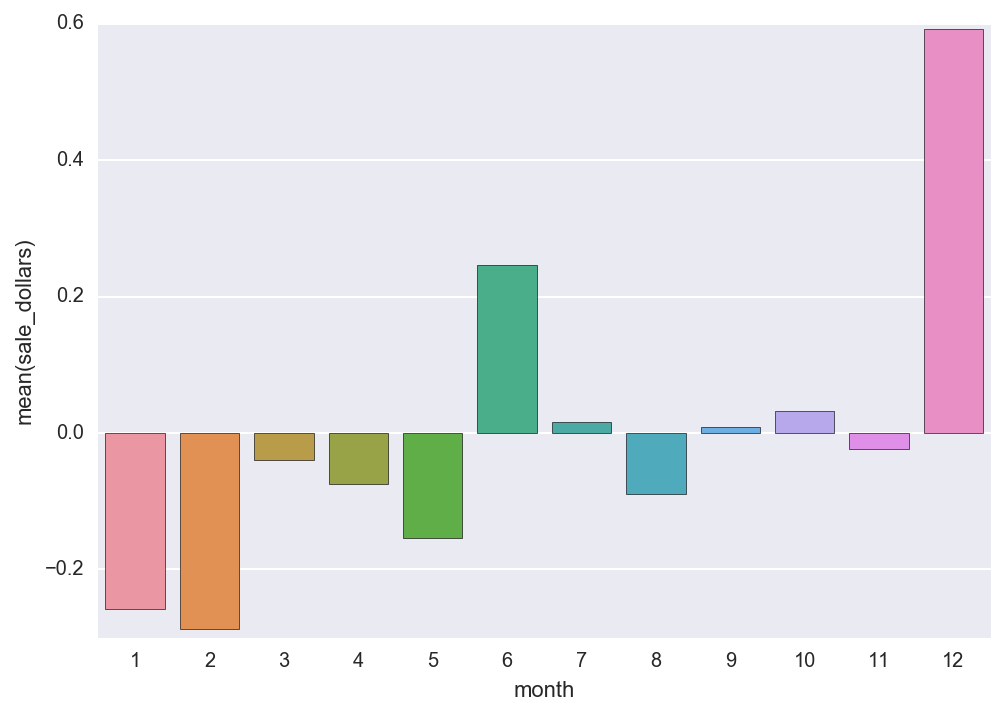

In [98]:
sns.barplot(x='month', y='sale_dollars', data=mean_std_permonth)

In [99]:
# 2. People buy the least amount of liquor on tuesdays.

# Make a datetime column and pull out tuesdays
iowa['date'] = iowa.date.map(lambda x: '-'.join(x.split('/')))
iowa['date'] = pd.to_datetime(iowa.date)

In [100]:
iowa['day_of_week'] = iowa.date.dt.weekday_name

In [101]:
avg_sales_perday = iowa.groupby('day_of_week').sale_dollars.agg(np.mean).reset_index()
avg_sales_perday

,day_of_week,sale_dollars
0,Friday,155.307583
1,Monday,137.993379
2,Saturday,124.926792
3,Thursday,141.916032
4,Tuesday,117.543676
5,Wednesday,120.967819


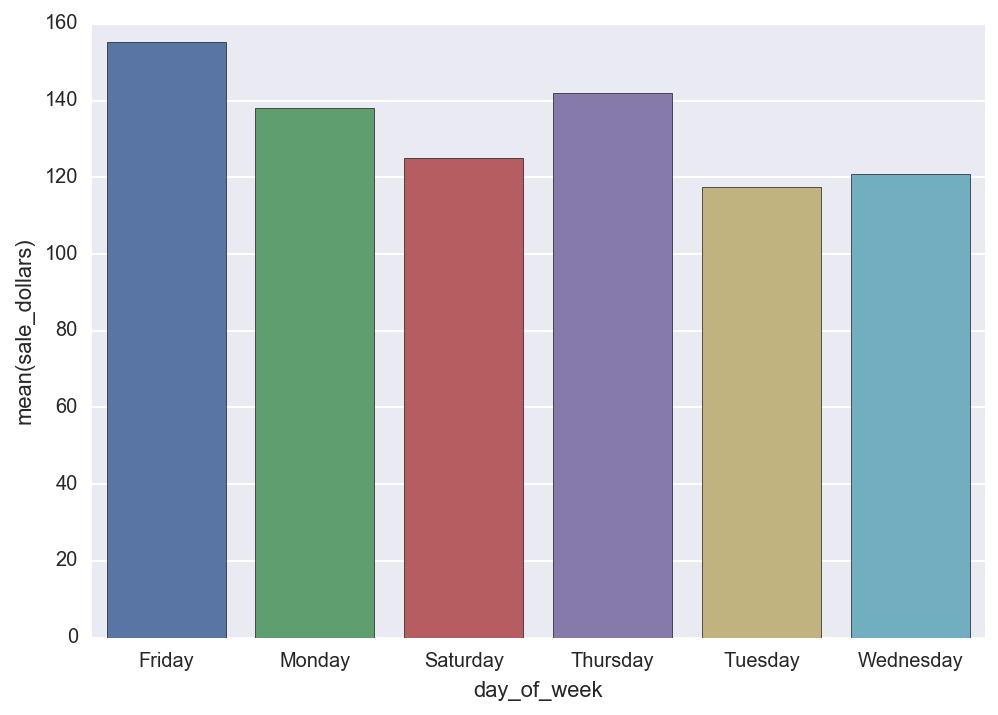

In [102]:
sns.barplot(x='day_of_week', y='sale_dollars', data=avg_sales_perday)

# It's true. Tuesday is the least appealing time to buy alcohol. I guess
# you can't buy alchohol on Sundays in Iowa.)